In [1]:
import pandas as pd
from bs4 import BeautifulSoup             
import re
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
train=pd.read_csv("Data.zip", header=0, \
                    delimiter="\t", quoting=3)
train=train.drop(['id'],axis=1)
train.head()

,sentiment,review
0,1,"""With all this stuff going down at the moment ..."
1,1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,0,"""The film starts with a manager (Nicholas Bell..."
3,0,"""It must be assumed that those who praised thi..."
4,1,"""Superbly trashy and wondrously unpretentious ..."


In [3]:
df2 = pd.read_csv('er.csv',encoding="latin-1")
df2.head()

,Unnamed: 0,type,review,label,file
0,0,test,Once again Mr. Costner has dragged out a movie...,neg,0_2.txt
1,1,test,This is an example of why the majority of acti...,neg,10000_4.txt
2,2,test,"First of all I hate those moronic rappers, who...",neg,10001_1.txt
3,3,test,Not even the Beatles could write songs everyon...,neg,10002_3.txt
4,4,test,Brass pictures (movies is not a fitting word f...,neg,10003_3.txt


In [4]:
df2=df2.drop(['Unnamed: 0','type','file'],axis=1)
df2.columns=['review','sentiment']
df2.head()

,review,sentiment
0,Once again Mr. Costner has dragged out a movie...,neg
1,This is an example of why the majority of acti...,neg
2,"First of all I hate those moronic rappers, who...",neg
3,Not even the Beatles could write songs everyon...,neg
4,Brass pictures (movies is not a fitting word f...,neg


In [5]:
#df2.sentiment
df2['sentiment']

0          neg
1          neg
2          neg
3          neg
4          neg
         ...  
99995    unsup
99996    unsup
99997    unsup
99998    unsup
99999    unsup
Name: sentiment, Length: 100000, dtype: object

In [6]:
df2 = df2[df2['sentiment'] != 'unsup']
df2['sentiment'] = df2['sentiment'].map({'pos': 1, 'neg': 0})
df2.head()

,review,sentiment
0,Once again Mr. Costner has dragged out a movie...,0
1,This is an example of why the majority of acti...,0
2,"First of all I hate those moronic rappers, who...",0
3,Not even the Beatles could write songs everyon...,0
4,Brass pictures (movies is not a fitting word f...,0


In [7]:
training=pd.concat([train,df2]).reset_index(drop=True)
training.shape

(75000, 2)

In [8]:
def review_to_words(raw_review):
    # Function to convert a raw review to a string of words
     # 1. Remove HTML
    review_text = BeautifulSoup(raw_review,).get_text() 
    #
    # 2. Remove non-letters        
    letters_only = re.sub("[^a-zA-Z]", " ", review_text) 
    #
    # 3. Convert to lower case, split into individual words
    words = letters_only.lower().split()                                             
    #
    # 4. In Python, searching a set is much faster than searching
    #   a list, so convert the stop words to a set
    stops = set(stopwords.words("english"))                  
    # 
    # 5. Remove stop words
    meaningful_words = [w for w in words if not w in stops]   
    #
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    return( " ".join( meaningful_words ))   

In [9]:
# Get the number of reviews based on the dataframe column size
num_reviews = training["review"].size

# Initialize an empty list to hold the clean reviews
clean_train_reviews = []

# Loop over each review; create an index i that goes from 0 to the length
# of the movie review list 
print ("Cleaning and parsing the training set movie reviews...\n")
clean_train_reviews = []
for i in range( 0, num_reviews ):
    # If the index is evenly divisible by 10000, print a message
    if( (i+1)%10000 == 0 ):
        print ("Review %d of %d\n" % ( i+1, num_reviews ))                                                                 
    clean_train_reviews.append( review_to_words( training["review"][i] ))
print("Done")

Cleaning and parsing the training set movie reviews...



/tmp/ipykernel_23/193055938.py:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text = BeautifulSoup(raw_review,).get_text()


Review 10000 of 75000

Review 20000 of 75000

Review 30000 of 75000

Review 40000 of 75000

Review 50000 of 75000

Review 60000 of 75000

Review 70000 of 75000

Done


In [10]:
import nltk
nltk.download('wordnet')
# Download window opens, fetch wordnet
from nltk.corpus import wordnet as wn

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [11]:
print ("Creating the bag of words...\n")
from sklearn.feature_extraction.text import CountVectorizer


vectorizer=CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 6000) 
#return list
train_data_features=vectorizer.fit_transform(clean_train_reviews)

#convert list to array
train_data_feature=train_data_features.toarray()

print("Done")

Creating the bag of words...

Done


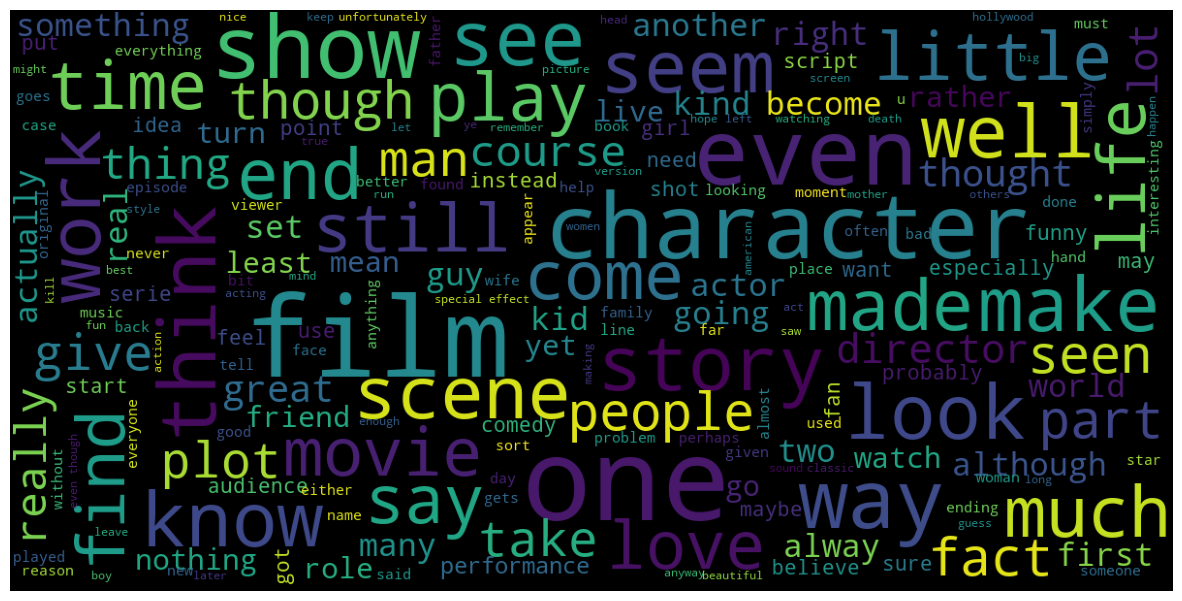

In [12]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data,title=None):
    wordcloud=WordCloud(
      
        background_color='black',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40,
        scale=3,
        random_state=1
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(clean_train_reviews)  

In [13]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(train_data_features,training["sentiment"],test_size=0.2,random_state=0)
print("Splitting Done")

Splitting Done


In [14]:
print ("Training the random forest model...")
from sklearn.ensemble import RandomForestClassifier

forest=RandomForestClassifier(n_estimators=100)

forest=forest.fit(x_train,y_train)
print("Done")

Training the random forest model...
Done


In [15]:
result=forest.predict(x_test)
print("Predictions Done")

Predictions Done


In [16]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix

accuracy=accuracy_score(y_test,result)
accuracy

0.934

In [17]:
cm=confusion_matrix(y_test,result)
cm

array([[7019,  464],
       [ 526, 6991]])

In [18]:
f1=f1_score(y_test,result)
f1

0.9338765695965804

In [19]:
from nltk.corpus import stopwords

test=pd.read_csv("tsv.zip", header=0, delimiter="\t", \
                   quoting=3 )

print(test.shape)

#clean reviews
num_reviews=len(test['review'])
clean_test_reviews = [] 

print ("Cleaning and parsing the test set movie reviews...\n")
for i in range(0,num_reviews):
    if( (i+1) % 5000 == 0 ):
        print ("Review %d of %d\n" % (i+1, num_reviews))
    clean_review = review_to_words( test["review"][i] )
    clean_test_reviews.append( clean_review )

#convert to araray
test_data_features=vectorizer.transform(clean_test_reviews) 
test_data_features=test_data_features.toarray()


#result
result=forest.predict(test_data_features)


#output
output=pd.DataFrame(data={"id":test['id'],"sentiment":result})

#submission
output.to_csv("i.csv", index=False, quoting=3 )
print("Done")

(25000, 2)
Cleaning and parsing the test set movie reviews...



/tmp/ipykernel_23/193055938.py:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text = BeautifulSoup(raw_review,).get_text()


Review 5000 of 25000

Review 10000 of 25000

Review 15000 of 25000

Review 20000 of 25000

Review 25000 of 25000

Done
